In [26]:
import librosa
import sklearn
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import csv

In [6]:
#load each song and get duration
#group 1
y, sr = librosa.load('02 - Bolt Thrower - Eternal War.mp3')
dur1 = librosa.get_duration(y=y, sr=sr)
bt1, sr1 = librosa.load('02 - Bolt Thrower - Eternal War.mp3', offset=30, duration=30)
y, sr = librosa.load('HELLSHOCK - Shadows Of The Afterworld - 01 Afterworld.mp3')
dur2 = librosa.get_duration(y=y, sr=sr)
bt2, sr2 = librosa.load('HELLSHOCK - Shadows Of The Afterworld - 01 Afterworld.mp3', offset=30, duration=30)

#group 2
y, sr = librosa.load('03 - Work.mp3')
dur3 = librosa.get_duration(y=y, sr=sr)
osrap1, sr3 = librosa.load('03 - Work.mp3', offset=30, duration=30)
y, sr = librosa.load("08 GZAGenius - Shadowboxin' (Feat. Method Man).mp3")
dur4 = librosa.get_duration(y=y, sr=sr)
osrap2, sr4 = librosa.load("08 GZAGenius - Shadowboxin' (Feat. Method Man).mp3", offset=30, duration=30)

#group 3
y, sr = librosa.load('02 - Unrecorded.mp3')
dur5 = librosa.get_duration(y=y, sr=sr)
e1, sr5 = librosa.load('02 - Unrecorded.mp3', offset=30, duration=30)
y, sr = librosa.load('07 - Wish.mp3')
dur6 = librosa.get_duration(y=y, sr=sr)
e2, sr6 = librosa.load('07 - Wish.mp3', offset=30, duration=30)

In [43]:
#print("mfcc: ", librosa.feature.mfcc(y=bt1, sr=sr1))
#print("sc: ", librosa.feature.spectral_centroid(y=bt1, sr=sr1))
#print("zcr: ", librosa.feature.zero_crossing_rate(y=bt1))
#print("cf: ", librosa.feature.chroma_stft(y=bt1, sr=sr1))
#print("sro: ", librosa.feature.spectral_rolloff(y=bt1, sr=sr1))

mfcc1 = librosa.feature.mfcc(y=bt1, sr=sr1, n_mfcc=15)
mfcc2 = librosa.feature.mfcc(y=bt2, sr=sr2, n_mfcc=15)
mfcc3 = librosa.feature.mfcc(y=osrap1, sr=sr3, n_mfcc=15)
sc1 = librosa.feature.spectral_centroid(y=bt1, sr=sr1)
sc3 = librosa.feature.spectral_centroid(y=osrap1, sr=sr3)
zcr1 = librosa.feature.zero_crossing_rate(y=bt2)
zcr3 = librosa.feature.zero_crossing_rate(y=osrap1)
cf1 = librosa.feature.chroma_stft(y=bt1, sr=sr1)
sro1 = librosa.feature.spectral_rolloff(y=bt1, sr=sr1)

#print(sr1, sr2)
#print(mfcc1.shape, sc1.shape, zcr1.shape, cf1.shape, sro1.shape)
print(zcr1, zcr3)
print(np.mean(zcr1), np.mean(zcr3))
#print(mfcc3)

[[0.06787109 0.10742188 0.13574219 ... 0.13183594 0.10595703 0.07910156]] [[0.109375   0.19238281 0.25146484 ... 0.24414062 0.22851562 0.15429688]]
0.14020550140286378 0.16003758102747678


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

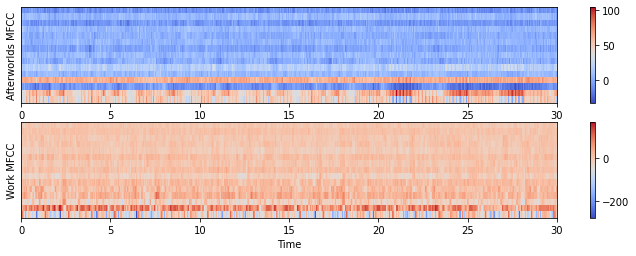

In [41]:
plt.figure(figsize=(12,6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc2, sr=sr1, x_axis='time')
plt.ylabel('Afterworlds MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(mfcc3, sr=sr3, x_axis='time')
plt.ylabel('Work MFCC')
plt.colorbar()

plt.tight_layout

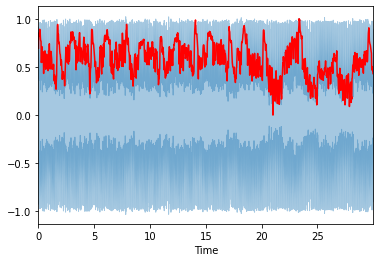

In [42]:
sc = librosa.feature.spectral_centroid(y=bt2, sr=sr1)[0]

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

frames = range(len(sc))
t = librosa.frames_to_time(frames)

librosa.display.waveplot(bt2, sr=sr1, alpha=0.4)
plt.plot(t, normalize(sc), color='r') # normalize for visualization purposes

In [ ]:
header = ['Title', 'MFCC', 'Spectral_Centroid', 'ZCR', 'Chroma_Frequencies', 'Spectral_Rolloff']

data = [
    []

]

with open('data.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    #write header
    writer.writerow(header)

    #write data
    writer.writerows(data)